<a href="https://colab.research.google.com/github/Notfamousyet/DataScience-Class-notes/blob/main/class13th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
un=pd.read_csv('/content/Universities.csv')

In [ ]:
un.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
un.shape

(25, 7)

In [ ]:
#normalizing function
import scipy.cluster.hierarchy as sch

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def norm_fun(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [ ]:
df_norm=norm_fun(un.iloc[:,1:])

In [ ]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


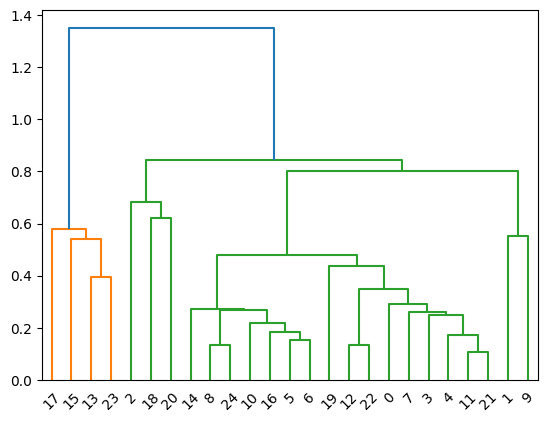

In [ ]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [ ]:
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='average')

In [ ]:
y_hc=hc.fit_predict(df_norm)

In [ ]:
y_hc

array([3, 2, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 3, 1, 0, 3, 0, 3,
       3, 1, 3])

In [ ]:
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [ ]:
clusters

,clusters
0,3
1,2
2,0
3,3
4,3
5,3
6,3
7,3
8,3
9,2


In [ ]:
df_norm['h_clusterid']=clusters

In [ ]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,3
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,2
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,3
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,3


In [ ]:
df_norm.sort_values('h_clusterid')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0
20,0.426829,0.513889,0.710526,0.526316,0.123307,0.600000,0
18,0.573171,0.930556,0.342105,0.578947,0.117293,0.366667,0
17,0.170732,0.291667,0.697368,1.000000,0.000000,0.000000,1
15,0.000000,0.000000,1.000000,0.684211,0.006597,0.066667,1
23,0.195122,0.166667,0.723684,0.473684,0.057462,0.133333,1
13,0.185366,0.138889,0.526316,0.631579,0.026991,0.433333,1
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,2
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,2
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,3


In [ ]:
df1=un.drop(['Univ'],axis=1)

In [ ]:
df1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [ ]:
df1['h_clusterid']=clusters

In [ ]:
df1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,1310,89,22,13,22704,94,3
1,1415,100,25,6,63575,81,2
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,3
4,1280,83,33,13,21864,90,3
5,1340,89,23,10,32162,95,3
6,1315,90,30,12,31585,95,3
7,1255,74,24,12,20126,92,3
8,1400,91,14,11,39525,97,3
9,1305,75,44,7,58691,87,2


In [ ]:
df_clust=df1.groupby('h_clusterid').mean()

In [ ]:
df_clust

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
h_clusterid,,,,,,
0,1226.666667,74.00,55.666667,14.000,18545.333333,78.333333
1,1061.500000,38.75,70.000000,19.250,9953.000000,71.750000
2,1360.000000,87.50,34.500000,6.500,61133.000000,84.000000
3,1313.437500,85.00,29.000000,11.625,29186.625000,92.375000


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import statsmodels.api as sm

In [ ]:
from sklearn import metrics

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/default2.csv')

In [ ]:
df.head()

,Gender,LoanOffered,Job,CreditScore,EMIRatio,Status,Purpose,Dependents
0,Male,0,unskilled,86,3.0,No,personal,2
1,Female,1,skilled,94,3.0,No,personal,3
2,Male,0,unskilled,86,3.0,No,personal,2
3,Female,1,skilled,94,3.0,No,personal,3
4,Male,1,skilled,85,3.3,No,personal,2


In [ ]:
df.shape

(781, 8)

In [ ]:
df['LoanOffered']=df['LoanOffered'].astype('category')

In [ ]:
df['Target']=np.where(df['Status']=='Default',1,0)

In [ ]:
df.head()

,Gender,LoanOffered,Job,CreditScore,EMIRatio,Status,Purpose,Dependents,Target
0,Male,0,unskilled,86,3.0,No,personal,2,0
1,Female,1,skilled,94,3.0,No,personal,3,0
2,Male,0,unskilled,86,3.0,No,personal,2,0
3,Female,1,skilled,94,3.0,No,personal,3,0
4,Male,1,skilled,85,3.3,No,personal,2,0


In [ ]:
df.drop(['Status'],axis=1,inplace=True)

In [ ]:
df.head()

,Gender,LoanOffered,Job,CreditScore,EMIRatio,Purpose,Dependents,Target
0,Male,0,unskilled,86,3.0,personal,2,0
1,Female,1,skilled,94,3.0,personal,3,0
2,Male,0,unskilled,86,3.0,personal,2,0
3,Female,1,skilled,94,3.0,personal,3,0
4,Male,1,skilled,85,3.3,personal,2,0


In [ ]:
x1=df.drop(['Target'],axis=1)

In [ ]:
y1=df[['Target']]

In [ ]:
x2=pd.get_dummies(x1,drop_first=True)

In [ ]:
x2

,CreditScore,EMIRatio,Dependents,Gender_Male,LoanOffered_1,Job_skilled,Job_unskilled,Purpose_consumerdurable,Purpose_education,Purpose_personal
0,86,3.0,2,1,0,0,1,0,0,1
1,94,3.0,3,0,1,1,0,0,0,1
2,86,3.0,2,1,0,0,1,0,0,1
3,94,3.0,3,0,1,1,0,0,0,1
4,85,3.3,2,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
776,46,14.7,0,1,0,0,1,1,0,0
777,54,14.7,0,1,0,0,1,0,0,0
778,51,14.8,0,1,0,0,1,0,0,0
779,54,14.8,0,1,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
xtn,xtt,ytn,ytt=train_test_split(x2,y1,test_size=0.3,random_state=42)

In [ ]:
logreg=LogisticRegression()

In [ ]:
logreg.fit(xtn,ytn)

LogisticRegression()

In [ ]:
ypred=logreg.predict(xtt)

In [ ]:
metrics.accuracy_score(ytt,ypred)

0.9446808510638298

In [ ]:
print(metrics.classification_report(ytt,ypred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       202
           1       0.86      0.73      0.79        33

    accuracy                           0.94       235
   macro avg       0.91      0.85      0.88       235
weighted avg       0.94      0.94      0.94       235



In [ ]:
import pickle

In [ ]:
pickle_out=open('name.pkl',mode='wb')

In [ ]:
pickle.dump(logreg,pickle_out)

In [ ]:
pickle_out.close()

In [ ]:
pickle.format_version

'4.0'

In [ ]:
%%writefile app.py

Overwriting app.py


In [ ]:
import pickle

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=450438a414919af5dd79abd3f0063e43352693734261d2e23834bf0cb20e6117
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [ ]:
import streamlit as st